In [1]:
import os
path = 'C:/pytest_img/'
os.chdir(path)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
from keras.datasets import mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [4]:
print(train_imgs.shape, test_imgs.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['acc'])

In [7]:
train_imgs = train_imgs.reshape((60000,28,28,1))
train_imgs = train_imgs.astype('float32')/255

test_imgs = test_imgs.reshape((10000,28,28,1))
test_imgs = test_imgs.astype('float32')/255

In [8]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# label을 범주형으로 만들어 분류 알고리즘에 적합한 형태가 되게 함

In [9]:
with tf.device('/CPU:0'):
    history = model.fit(train_imgs, train_labels, epochs = 5, batch_size = 128, validation_data = (test_imgs, test_labels))

Epoch 1/5
469/469 [==============================] - 58s 122ms/step - loss: 0.1845 - acc: 0.9436 - val_loss: 0.0443 - val_acc: 0.9857
Epoch 2/5
469/469 [==============================] - 59s 126ms/step - loss: 0.0602 - acc: 0.9812 - val_loss: 0.0355 - val_acc: 0.9887
Epoch 3/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0296 - val_acc: 0.9906
Epoch 4/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0315 - val_acc: 0.9895
Epoch 5/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0291 - val_acc: 0.9900


In [11]:
with tf.device('/CPU:0'):
    test_loss, test_acc = model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0291 - acc: 0.9900


In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

In [13]:
import matplotlib.pyplot as plt

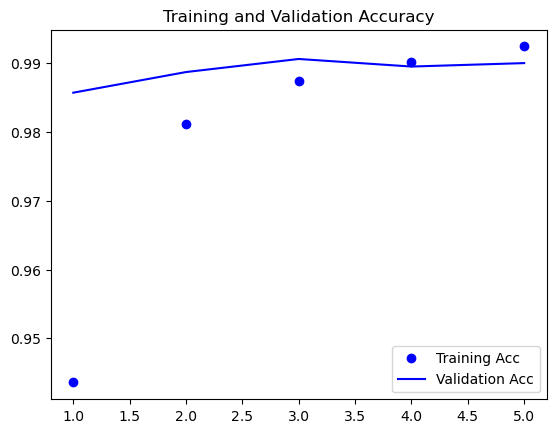

In [14]:
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

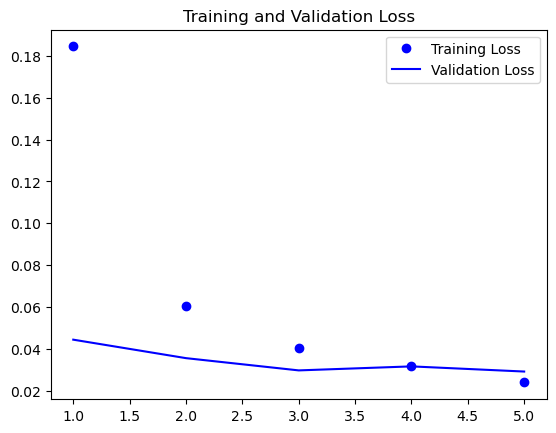

In [15]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()